In [1]:
from DataAugmenter import DataAugmenter,show_few_examples_augmentation

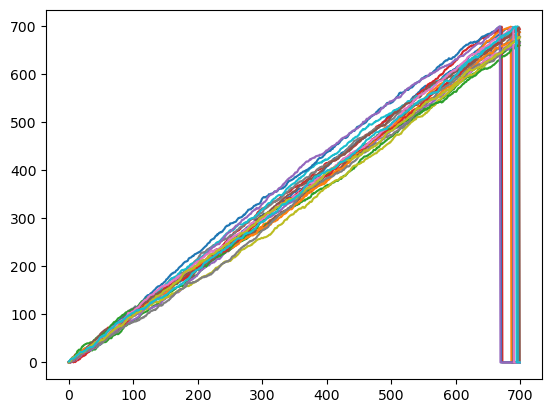

In [4]:
gpu_computation=False;
##Only brownian augmentation
da = DataAugmenter(brow_std=0.9,magnitude_rel_std=0.0001,stretch_rel_std=0.0001,noise_std=0.0001,fill_noise_std=0.05,apply_brownian_aug=True,gpu_computation=gpu_computation)
show_few_examples_augmentation(da,ex_translocation_type="arange",n_show=20)


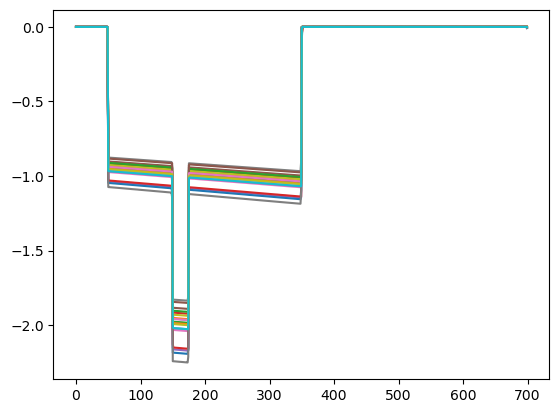

In [7]:
##Only magnitude std
da = DataAugmenter(brow_std=0.9,magnitude_rel_std=0.05,stretch_rel_std=0.0001,noise_std=0.0001,fill_noise_std=0.005,apply_brownian_aug=False,gpu_computation=gpu_computation)
show_few_examples_augmentation(da,ex_translocation_type="translocation fake",n_show=20)

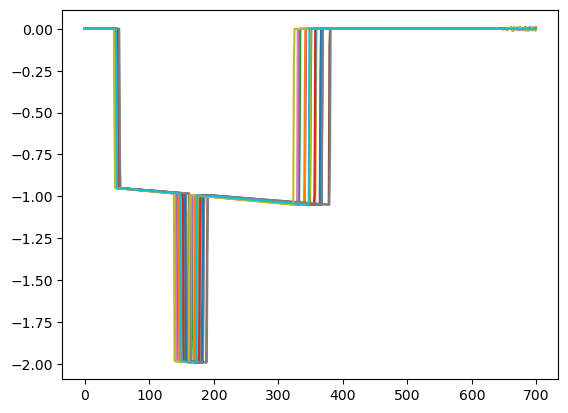

In [8]:
##Only stretch std
da = DataAugmenter(brow_std=0.9,magnitude_rel_std=0.00001,stretch_rel_std=0.05,noise_std=0.0001,fill_noise_std=0.005,apply_brownian_aug=False,gpu_computation=gpu_computation)
show_few_examples_augmentation(da,ex_translocation_type="translocation fake",n_show=20)

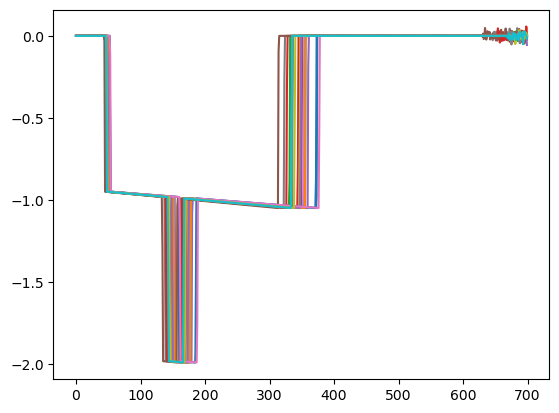

In [9]:
##Fill with bigger noise
da = DataAugmenter(brow_std=0.9,magnitude_rel_std=0.0001,stretch_rel_std=0.05,noise_std=0.0001,fill_noise_std=0.02,apply_brownian_aug=False,gpu_computation=gpu_computation)
show_few_examples_augmentation(da,ex_translocation_type="translocation fake",n_show=20)

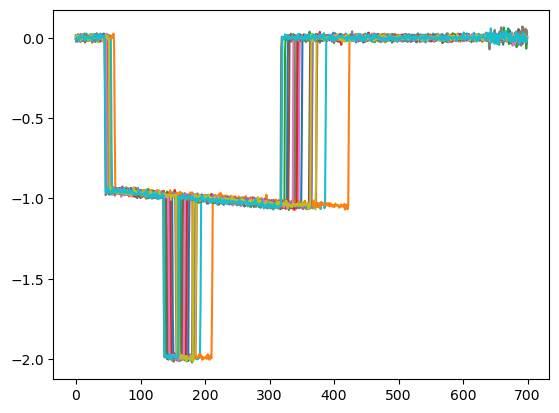

In [10]:
##stretch and noise
da = DataAugmenter(brow_std=0.9,magnitude_rel_std=0.0001,stretch_rel_std=0.05,noise_std=0.01,fill_noise_std=0.02,apply_brownian_aug=False,gpu_computation=gpu_computation)
show_few_examples_augmentation(da,ex_translocation_type="translocation fake",n_show=20)

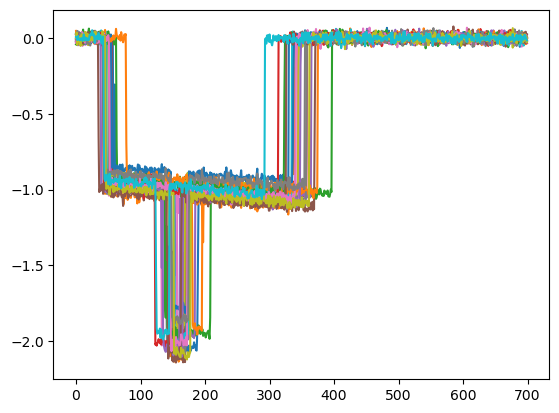

In [11]:
##With all:
da = DataAugmenter(brow_std=0.9,magnitude_rel_std=0.04,stretch_rel_std=0.03,noise_std=0.02,fill_noise_std=0.005,apply_brownian_aug=True,gpu_computation=gpu_computation)
show_few_examples_augmentation(da,ex_translocation_type="translocation fake",n_show=20)